# Descision Tree

In [ ]:
-->Descision Tree consists of three nodes :- 1)Root Node
        
                                             2)Decision Node
            
                                             3)Terminal Node
                

-->To built a tree we use Entropy and Information gain.

-->Entropy means Measure of uncertainity

-->Information Gain : Reduction in Entropy

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [122]:
df = pd.read_csv('bank.csv')

In [123]:
df.shape

(11162, 17)

In [124]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [125]:
df.deposit.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [126]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [162]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [128]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model


In [129]:
dt=DecisionTreeClassifier()

In [130]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1165
           1       0.78      0.77      0.77      1068

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



DecisionTreeClassifier()

In [131]:
dt.score(xtrain,ytrain)

1.0

In [132]:
dt.score(xtest,ytest)

0.7845947156291984

In [133]:
dt.feature_importances_

array([0.0771071 , 0.02690233, 0.01567375, 0.01574732, 0.00038809,
       0.08751518, 0.0368405 , 0.0070411 , 0.0628903 , 0.07977665,
       0.10666482, 0.34607951, 0.02458443, 0.06730502, 0.0083254 ,
       0.03715851])

# Hyperparameter Tunning

In [134]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1165
           1       0.79      0.83      0.81      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(max_depth=10)

In [135]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7098074339453649
2: 0.7098074339453649
3: 0.7751903269144649
4: 0.7832512315270936
5: 0.8051948051948052
6: 0.8051948051948052
7: 0.812807881773399
8: 0.8137035378414689
9: 0.8078817733990148
10: 0.8092252575011196
11: 0.8168383340797134
12: 0.8114643976712942
13: 0.8137035378414689
14: 0.80653828929691
15: 0.799820868786386
16: 0.7904164800716524
17: 0.7984773846842812
18: 0.7904164800716524
19: 0.7850425436632333
20: 0.787281683833408
21: 0.7832512315270936
22: 0.7886251679355127
23: 0.7832512315270936
24: 0.7859381997313032
25: 0.7828034034930587
26: 0.7832512315270936
27: 0.7814599193909538
28: 0.7908643081056874
29: 0.7828034034930587
30: 0.7819077474249888
31: 0.7854903716972682
32: 0.7796686072548141
33: 0.7836990595611285
34: 0.7819077474249888
35: 0.7845947156291984
36: 0.7823555754590238
37: 0.7832512315270936
38: 0.7859381997313032
39: 0.7850425436632333
40: 0.7863860277653381
41: 0.7787729511867443
42: 0.7877295118674429
43: 0.7836990595611285
44: 0.7850425436632333
45

In [136]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1165
           1       0.81      0.81      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



DecisionTreeClassifier(max_depth=11)

In [137]:
dt4=DecisionTreeClassifier(min_samples_leaf=10) #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1165
           1       0.81      0.80      0.80      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(min_samples_leaf=10)

In [138]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")
    

1: 0.7881773399014779
2: 0.7756381549484997
3: 0.7922077922077922
4: 0.7904164800716524
5: 0.799820868786386
6: 0.8047469771607703
7: 0.8110165696372593
8: 0.812360053739364
9: 0.819525302283923
10: 0.812807881773399
11: 0.8240035826242723
12: 0.8280340349305867
13: 0.8244514106583072
14: 0.8217644424540976
15: 0.8231079265562025
16: 0.8231079265562025
17: 0.8302731751007613
18: 0.8334079713390058
19: 0.8356471115091805
20: 0.8356471115091805
21: 0.8343036274070756
22: 0.8334079713390058
23: 0.8298253470667264
24: 0.8316166592028661
25: 0.8289296909986565
26: 0.8280340349305867
27: 0.8262427227944469
28: 0.825794894760412
29: 0.8262427227944469
30: 0.8248992386923422
31: 0.8244514106583072
32: 0.8240035826242723
33: 0.825794894760412
34: 0.8231079265562025
35: 0.8213166144200627
36: 0.8208687863860278
37: 0.8163905060456784
38: 0.8163905060456784
39: 0.8199731303179579
40: 0.8199731303179579
41: 0.8199731303179579
42: 0.819525302283923
43: 0.819525302283923
44: 0.8208687863860278
45: 0

In [139]:
dt5=DecisionTreeClassifier(min_samples_leaf=19)
mymodel(dt5)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1165
           1       0.82      0.84      0.83      1068

    accuracy                           0.84      2233
   macro avg       0.83      0.84      0.83      2233
weighted avg       0.84      0.84      0.84      2233



DecisionTreeClassifier(min_samples_leaf=19)

In [144]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1165
           1       0.79      0.84      0.82      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



DecisionTreeClassifier(min_samples_leaf=41)

In [145]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.80      0.72      0.75      1165
           1       0.72      0.80      0.76      1068

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

In [146]:
dt10=DecisionTreeClassifier(max_depth=2)
mymodel(dt10)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1165
           1       0.66      0.81      0.73      1068

    accuracy                           0.71      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.71      0.71      2233



DecisionTreeClassifier(max_depth=2)

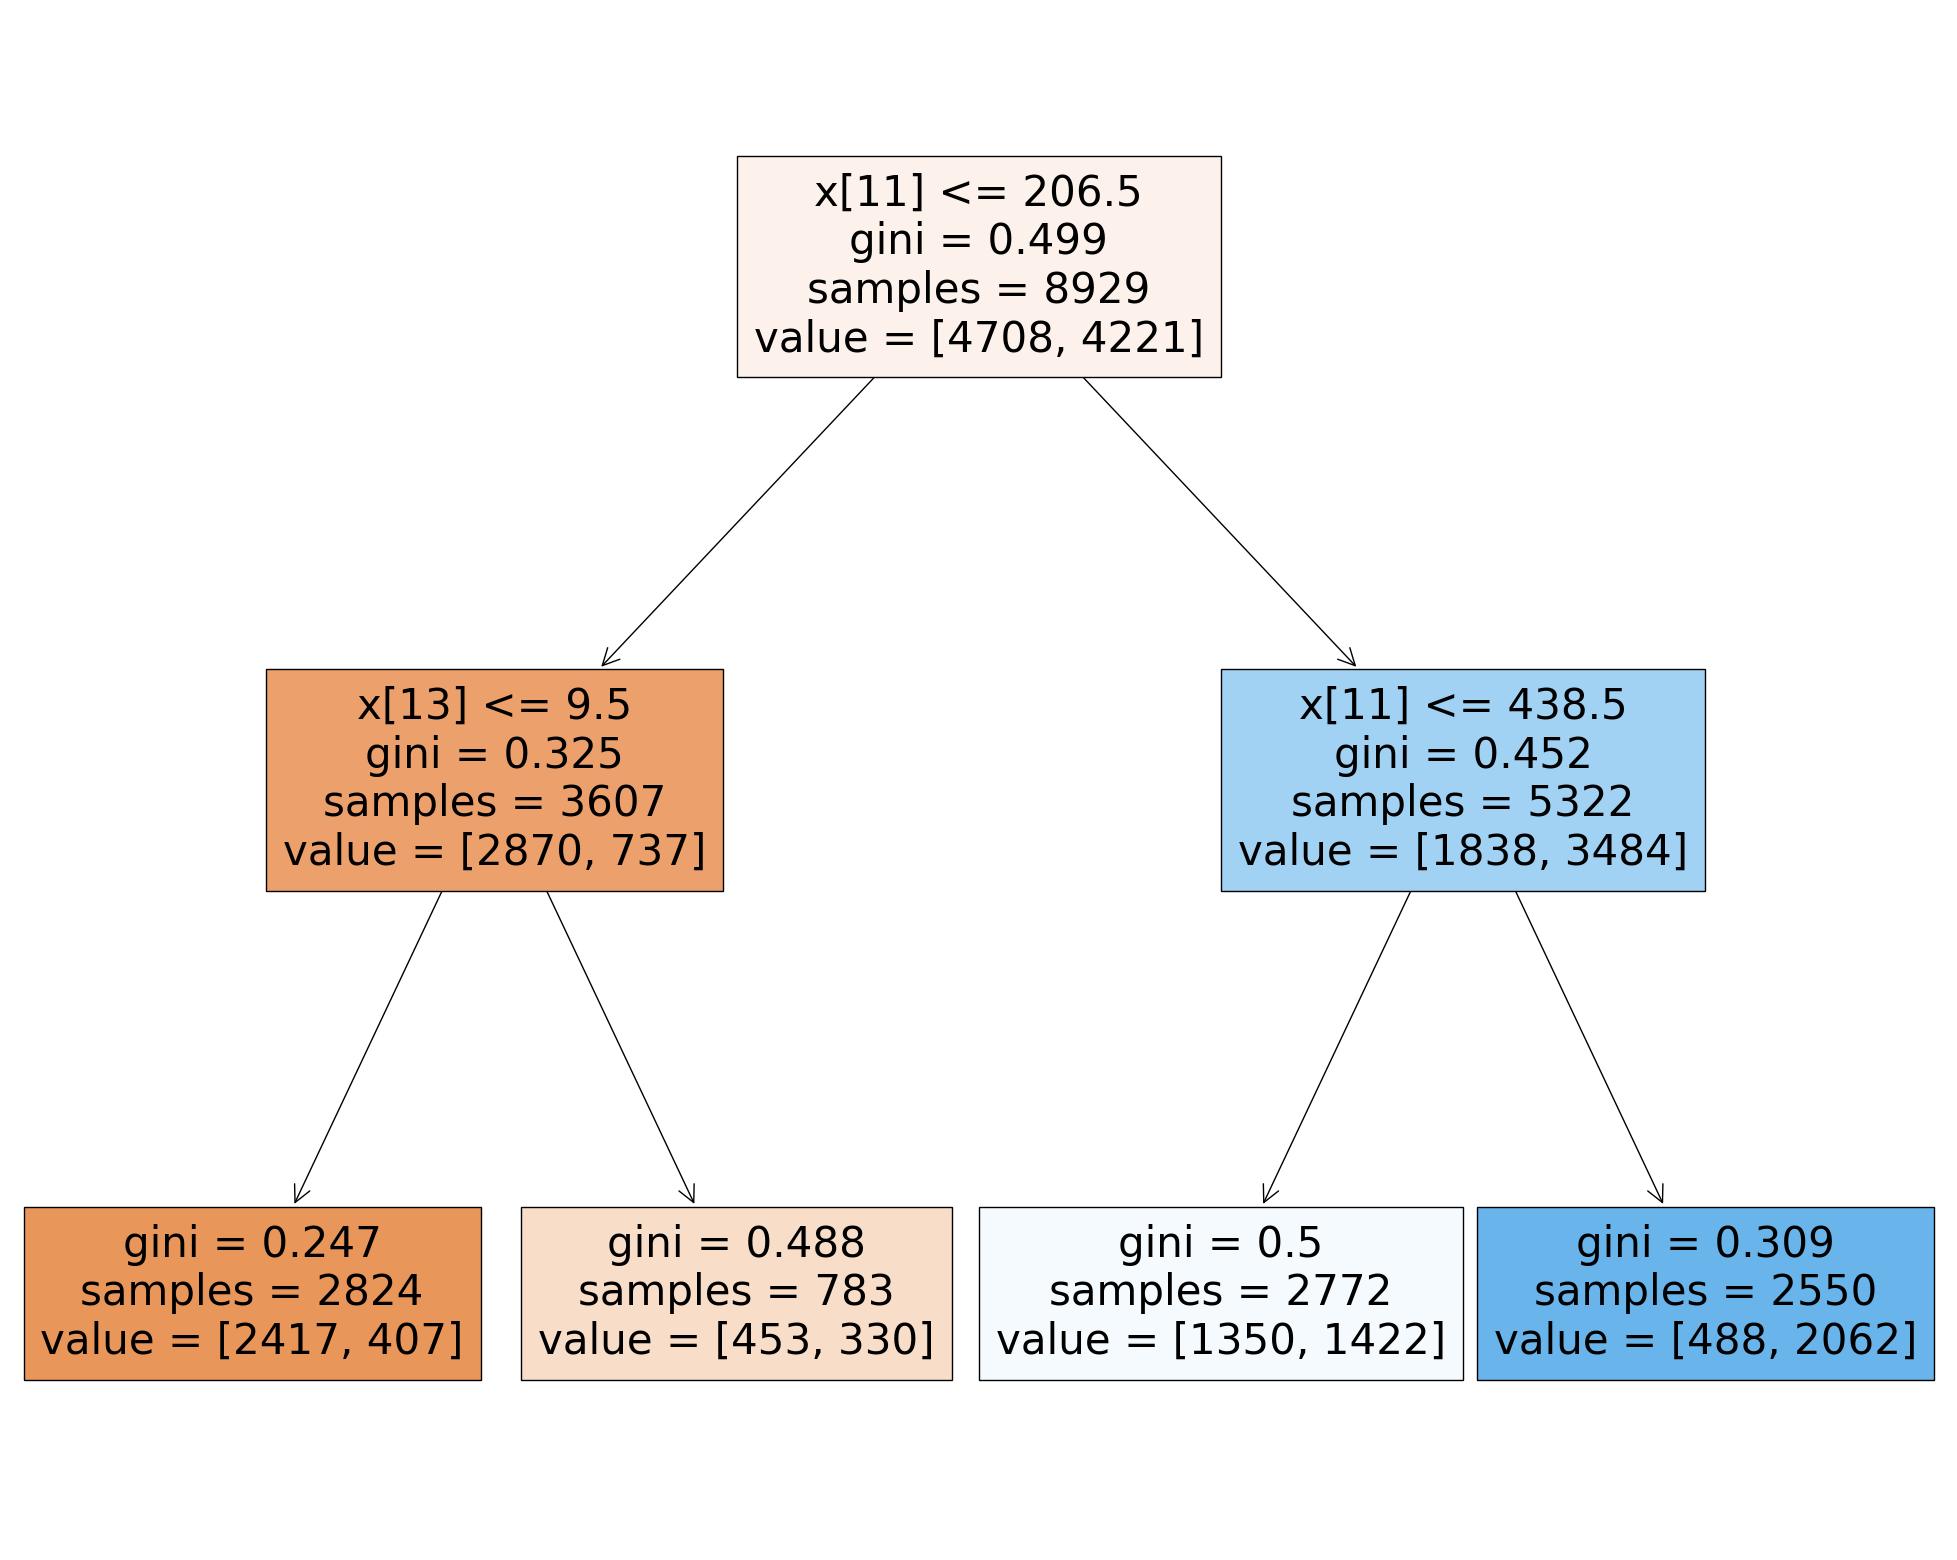

In [179]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t = tree.plot_tree(dt10,filled=True)

In [166]:
from sklearn.model_selection import GridSearchCV

params = {"criterion" : ['gini', 'entropy'],
           'max_depth' : [3, 4, 5, 7],
           'min_samples_leaf' : [10, 20, 50, 100, 150],
         }
grid_search = GridSearchCV(dt, param_grid=params)

In [168]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [170]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50}

In [171]:
my_best_preds = grid_search.predict(xtest)

In [172]:
accuracy_score(ytest, my_best_preds)

0.8132557098074339

In [173]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1165
           1       0.80      0.82      0.81      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

